# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
path = '/content/drive/MyDrive/SEM 7/DS 3001/Assignments/Bootstrap/mammogram.csv'
df = pd.read_csv(path, low_memory=False)
print(df.shape, '\n')
df.head()

(89835, 2) 



,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [5]:
# cross tabulate:
pd.crosstab(df['treatment'],df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


**The difference in 25-year survival rates between the two groups are only by 5 deaths, with the mammogram group having slightly less deaths (500) than the control group (505). This indicates that there might not be as much of a difference between the mammogram and traditional breast cancer screenings in preventing breast cancer deaths.**

2. Bootstrap the densities and distributions of survival rates for the two groups.

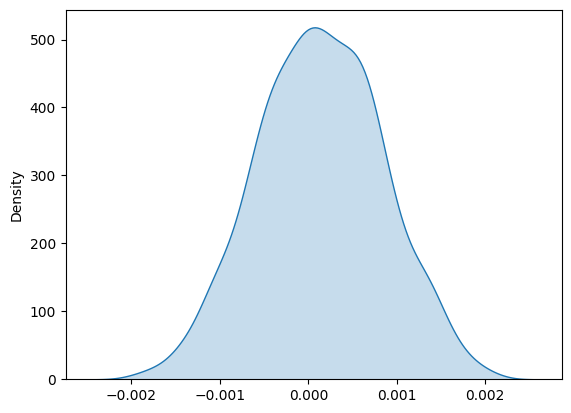

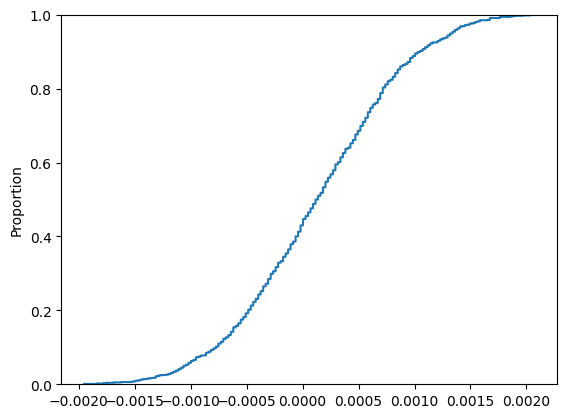

In [10]:
# assign numeric values
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

# samples
s = 1000
bootstrap = []

# bootstrap
for x in range(s):
    # groups
    treatment_group = df_treat.sample(df_treat.shape[0],axis=0,replace=True) # resample mammogram group
    control_group = df_control.sample(df_control.shape[0],axis=0,replace=True) # resample control group
    # overall effect
    effect = np.mean(treatment_group['survive']) - np.mean(control_group['survive'])
    bootstrap.append(effect)

# density of survival rates
sns.kdeplot(bootstrap,fill=True)
plt.show()

# distrbution of survival rates
sns.ecdfplot(bootstrap)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [12]:
CI = .99 # interval level
lower_bound = np.quantile(bootstrap, .005 )
upper_bound = np.quantile(bootstrap, .995)


print('99% CI: (', lower_bound, ', ', upper_bound, ')' )

99% CI: ( -0.00162186747823231 ,  0.0018517828831471172 )


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

**According to our confidence interval, 99% of our Bootstrap samples the estimated difference was between -.002 and .002. Because this interval includes zero, we can say that the group receiving the mammogram screening is not statistically different than the traditional breast cancer screenings at preventing breast cancer deaths. However, our results could be influenced by confounding variables that are unaccounted for in this study. Given the lack of other variables being measured, more variables should be collected before implementing any conclusions from this kind of study, such as age, SES, etc.**

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

In [27]:
# load the data
path = '/content/drive/MyDrive/SEM 7/DS 3001/Assignments/Bootstrap/diabetes_hw.csv'
df = pd.read_csv(path, low_memory=False)
print(df.shape, '\n')
df.head()

(699, 3) 



,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


1. Cross tabulate `treatment` and `outcome`.

In [28]:
# cross tabulate:
pd.crosstab(df['treatment'],df['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [29]:
# proportion of successes- lifestyle
print('lifestyle success rate: ', 125/(125+109), '\n')
# proportion of successes- met (drug)
print('met success rate: ', 112/(112+120), '\n')
# proportion of successes- rosi (drug)
print('rosi success rate: ', 143/(143+90), '\n')

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?


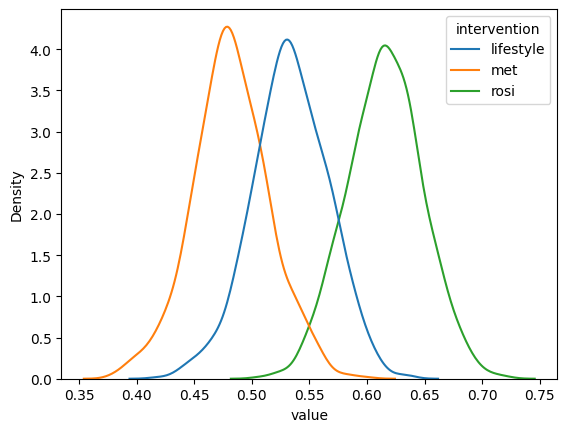

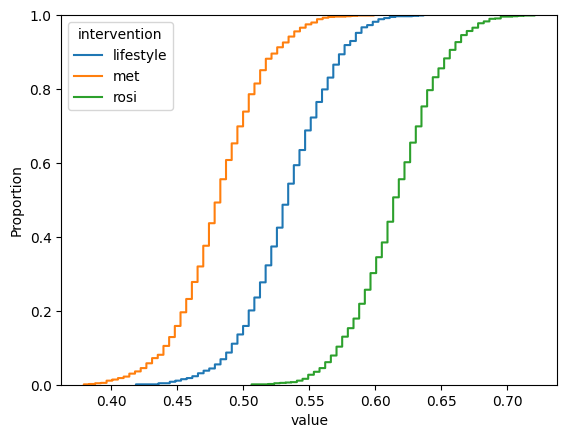

In [20]:
# assign numeric values
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_met = df.loc[ df['treatment'] == 'met', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]

# samples
s = 1000
boot_life = []
boot_met = []
boot_rosi = []

# bootstrap
for x in range(s):
    # groups
    lifestyle_group = df_lif.sample(df_lif.shape[0],axis=0,replace=True) # resample lifestyle group
    met_group = df_met.sample(df_met.shape[0],axis=0,replace=True) # resample met group
    rosi_group = df_ros.sample(df_ros.shape[0],axis=0,replace=True) # resample rosi group
    # means of groups
    effect_life = np.mean(lifestyle_group['success'])
    effect_met = np.mean(met_group['success'])
    effect_rosi = np.mean(rosi_group['success'])
    # add to lists
    boot_life.append(effect_life)
    boot_met.append(effect_met)
    boot_rosi.append(effect_rosi)

# organize groups into one: bootstrap
lif_group = pd.DataFrame({'value':boot_life, 'intervention':'lifestyle'})
met_group = pd.DataFrame({'value':boot_met, 'intervention':'met'})
ros_group = pd.DataFrame({'value':boot_rosi, 'intervention':'rosi'})
bootstrap = pd.concat([lif_group, met_group, ros_group], axis=0)

# density plot
sns.kdeplot(data=bootstrap, x='value', hue ='intervention')
plt.show()

# distrbution plot
sns.ecdfplot(data=bootstrap, x='value', hue='intervention')
plt.show()

**The rosi drug treatment appears to be the most effective, and the mesi drug seems to be the least effective. I did accidently ran the bootstrap a few times so the density plot seems smoother than in reality.**

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes.

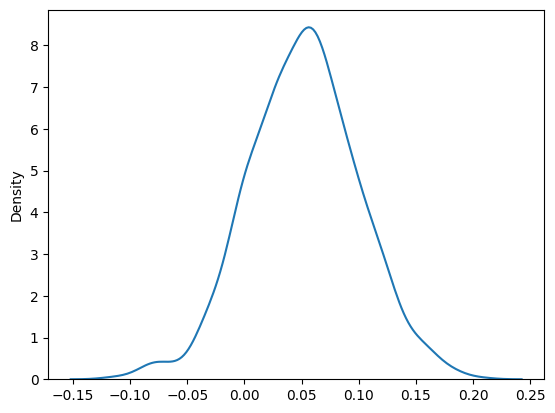

90% CI (lifestyle minus met):  -0.025976274683171326 ,  0.12883694370763338


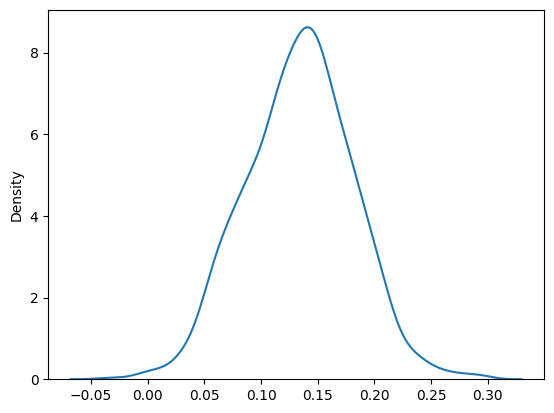

90% CI (rosi minus met):  0.05782799319224511 ,  0.20833949977800797


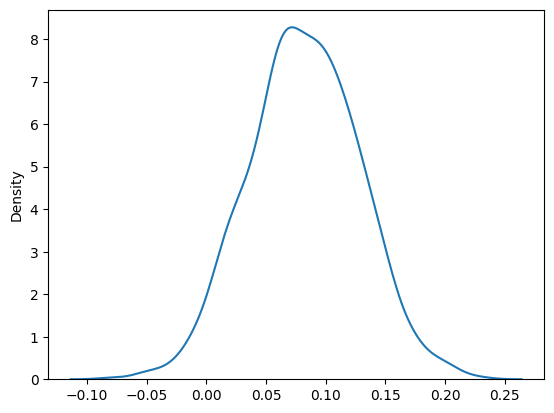

90% CI (rosi minus lifestyle):  0.010894684714427227 ,  0.15647445068045923


In [31]:
# compare lifestyle vs met treatment
life_versus_met = np.array(boot_life)-np.array(boot_met)
sns.kdeplot(x=life_versus_met)
plt.show()
print('90% CI (lifestyle minus met): ', np.quantile(life_versus_met,.05), ', ', np.quantile(life_versus_met,.95))

# compare met vs rosi treatment
rosi_versus_met = np.array(boot_rosi)-np.array(boot_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% CI (rosi minus met): ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

# compare rosi vs lifestyle treatment
rosi_versus_life = np.array(boot_rosi)-np.array(boot_life)
sns.kdeplot(x=rosi_versus_life)
plt.show()
print('90% CI (rosi minus lifestyle): ', np.quantile(rosi_versus_life,.05), ', ', np.quantile(rosi_versus_life,.95))

At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

**Both the rosi vs. met treatment and the rosi vs. lifestyle treatment pairs' comparisons are significantly different, since neither include zero in their 90% confidence intervals.**

5. Which treatment appears to be the most effective overall?

**The rosi treatment appears to be more effective than the lifestyle and metform treatment, given that the confidence intervals comparing the rosi drug to both groups do not include zero. Overall, the rosi treatment seems to be the most effective, however we have to keep in mind that this does not mean that the rosi treatment should necessarily be the first in line to treat diabetes. If lifestyle is an effective treatment (and it is more effective than the met drug in this study), then it's worth to explore this option before prescribing drugs that could have other potential side-effects.**

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?